### 33B21009 情報数理学専攻森田研究室　羽田充宏

## 知識情報学第10回演習サンプルプログラム ex10.ipynb
- Programmed by Nattapong Thammasan, 監修　福井健一
- Modified by Wasin Kalintha and Ekasit Phermphoonphiphat
- Checked with Python 3.8, scikit-learn 0.23.2
- Last updated: 2017/12/10
- MIT License

## K-means法によるWineデータのクラスタリング

In [1]:
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import scale
from collections import Counter
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from matplotlib import cm

In [2]:
# scikit-learnのデータセットからwineデータを読み込み
wine = datasets.load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
# 2次元に限定
d1 = 0
d2 = 1
X = scale(wine.data[:, [d1, d2]])
y = wine.target

### K-meansクラスタリングの実行
【課題2】クラスタリング結果を考察してみましょう．
 - 使用する特徴量を変えてみてもよい．

In [4]:
km = KMeans(n_clusters=4,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=1)
y_km = km.fit_predict(X)

### 割り当てられたクラスタによりクラスタリング結果を描画

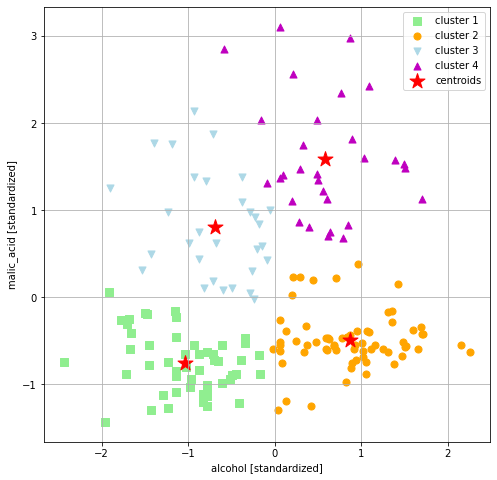

In [5]:
# 描画に使用する色とマークのセット
colors = (["lightgreen", "orange", "lightblue", "m", "b", "g", "c", "y", "w", "k"])
markers = (["s", "o", "v", "^", "D", ">", "<", "d", "p", "H"])

plt.figure(figsize=(8,8))
for idx in range(0, km.cluster_centers_.shape[0]):
    plt.scatter(X[y_km == idx, 0],
                X[y_km == idx, 1],
                s=50,
                c=colors[idx],
                marker=markers[idx],
                label="cluster " + str(idx+1))

plt.scatter(km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    s=250,
    marker='*',
    c='red',
    label='centroids')
plt.xlabel(wine.feature_names[d1]+' [standardized]')
plt.ylabel(wine.feature_names[d2]+' [standardized]')
plt.legend()
plt.grid()

### クラスとクラスタ中心を描画
【課題1(a)】 上の割り当てられたクラスタの描画を参考に，クラスとクラスタ中心を描画するように変更する

In [6]:
n_class = len(set(y))

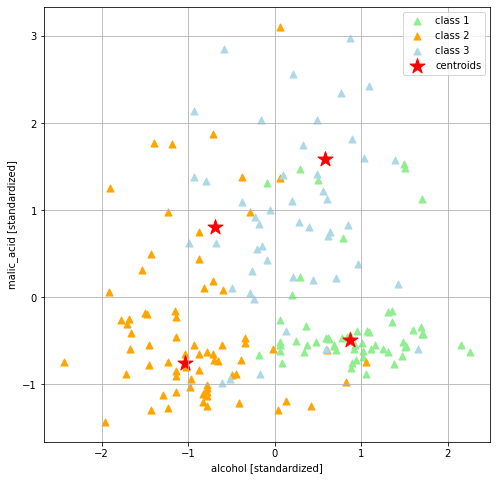

In [7]:
# 描画に使用する色とマークのセット
colors = (["lightgreen", "orange", "lightblue", "m", "b", "g", "c", "y", "w", "k"])
markers = (["s", "o", "v", "^", "D", ">", "<", "d", "p", "H"])

plt.figure(figsize=(8,8))
for c in range(n_class):
    plt.scatter(X[y == c, 0],
                X[y == c, 1],
                s=50,
                c=colors[c],
                marker=markers[idx],
                label="class " + str(c+1))

plt.scatter(km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    s=250,
    marker='*',
    c='red',
    label='centroids')
plt.xlabel(wine.feature_names[d1]+' [standardized]')
plt.ylabel(wine.feature_names[d2]+' [standardized]')
plt.legend()
plt.grid()

### クラスタ数を変えて内部基準SSEをグラフにプロット
【課題1(b)】横軸クラスタ数，縦軸SSEのグラフをプロット
- ヒント：SSEはscikit-learnのK-meansではintertia_で参照可能

In [8]:
sse = []
for num_cls in range(1,30):
    km = KMeans(n_clusters=num_cls,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=1)
    km.fit(X)
    sse.append(km.inertia_)

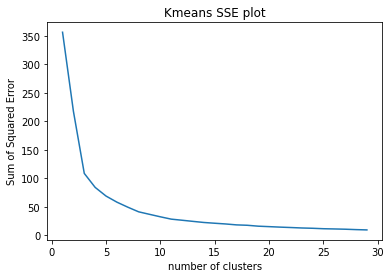

In [9]:
plt.plot(range(1,30),sse)
plt.xlabel('number of clusters')
plt.ylabel('Sum of Squared Error')
plt.title('Kmeans SSE plot')
plt.show()

### クラスタ数を変えたときの外部基準Purityをグラフにプロット
【課題1(c)】課題1(b)と同様に，横軸クラスタ数，縦軸Purityのグラフをプロット
- ただし，Purityはscikit-learnに実装されていない

In [10]:
purities = []
for num_cls in range(1,179):
    km = KMeans(n_clusters=num_cls,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=1)
    y_km = km.fit_predict(X)
    
    purity = 0
    for ci in range(num_cls):
        purity += max(Counter(y[y_km == ci]).values())
    purity /= len(y)
    purities.append(purity)

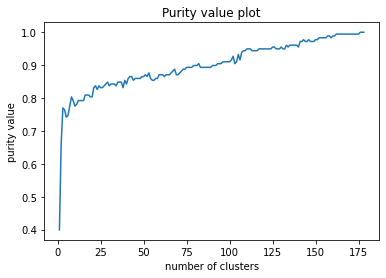

In [11]:
plt.plot(range(1,179), purities)
plt.ylabel('purity value')
plt.xlabel('number of clusters')
plt.title('Purity value plot')
plt.show()

In [12]:
purities[-1]

1.0

グラフよりpurityの値はクラスター数が増えるについれて良い値となっていくことが確認できる(purityの最大値は1)．  
これはクラスター数が増えるにつれて，各クラスターに含まれるデータ数が少なくなっていき，同じクラスターに異なるラベル(教師データの意味で)のデータが含まれにくくなっていることに起因する．  
従ってクラスター数がデータ数と等しい極端な例を考えれば(purities[-1]の値)，全てのクラスターに一つのデータのみ含まれる状況となり，この時purityの値は必ず1となる．  
一方でクラスター数の増加に伴って，purityの値は改善するが，解釈性は減少していくのでkmeansにおけるエルボー法同様に，ある程度目的関数値の改善量がなだらかになってきたと思われるところで打ち止めるなどの対策が必要となる．(上の例ではクラスター数が2から4のあたり．)

## 課題10-2(及び追加考察)

以下では，特徴量を二つ選んで二次元平面でのデータの射影についてシルエット係数を用いた分析を行うことを考える．  
この時クラスター数は教師データから3と決め打ちしておくものとする．  
全ての組合せの中からシルエット係数が高かった5つの組み合わせについて抜き出して可視化を行う.

In [13]:
def plot_kmeans_shilhouette(d1, d2):
    X = scale(wine.data[:, [d1, d2]])
    km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=1)
    y_km = km.fit_predict(X)

    cluster_labels = np.unique(y_km)       # y_kmの要素の中で重複を無くす
    n_clusters=cluster_labels.shape[0]     # 配列の長さを返す。つまりここでは n_clustersで指定した3となる

    # シルエット係数を計算
    silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')  # サンプルデータ, クラスター番号、ユークリッド距離でシルエット係数計算
    y_ax_lower, y_ax_upper= 0,0
    yticks = []
    fig = plt.figure(figsize = (30,10))
    ax1 = fig.add_subplot(1,2,1)
    
    for i,c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[y_km==c]      # cluster_labelsには 0,1,2が入っている（enumerateなのでiにも0,1,2が入ってる（たまたま））
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)              # サンプルの個数をクラスターごとに足し上げてy軸の最大値を決定
            color = cm.jet(float(i)/n_clusters)               # 色の値を作る
            ax1.barh(range(y_ax_lower,y_ax_upper),            # 水平の棒グラフのを描画（底辺の範囲を指定）
                             c_silhouette_vals,               # 棒の幅（1サンプルを表す）
                             height=1.0,                      # 棒の高さ
                             edgecolor='none',                # 棒の端の色
                             color=color)                     # 棒の色
            yticks.append((y_ax_lower+y_ax_upper)/2)          # クラスタラベルの表示位置を追加
            y_ax_lower += len(c_silhouette_vals)              # 底辺の値に棒の幅を追加

    silhouette_avg = np.mean(silhouette_vals)                 # シルエット係数の平均値
    ax1.axvline(silhouette_avg,color="red",linestyle="--")    # 係数の平均値に破線を引く 
    plt.yticks(yticks,cluster_labels + 1)                     # クラスタレベルを表示
    plt.ylabel('Cluster')
    plt.xlabel('silhouette coefficient')
       
    ax2 = fig.add_subplot(1,2,2)
    for idx in range(0, km.cluster_centers_.shape[0]):
        plt.scatter(X[y_km == idx, 0],
                    X[y_km == idx, 1],
                    s=50,
                    c=colors[idx],
                    marker=markers[idx],
                    label="cluster " + str(idx+1))

    plt.scatter(km.cluster_centers_[:, 0],
        km.cluster_centers_[:, 1],
        s=250,
        marker='*',
        c='red',
        label='centroids')
    plt.xlabel(wine.feature_names[d1]+' [standardized]')
    plt.ylabel(wine.feature_names[d2]+' [standardized]')
    plt.legend()
    plt.grid()
    plt.show()

In [14]:
feature_num = len(wine.feature_names)

In [15]:
res = {}
for d1,d2 in combinations(range(feature_num),2):
    X = scale(wine.data[:, [d1, d2]])
    km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=1)
    y_km = km.fit_predict(X)
    res[(d1,d2)] = np.mean(silhouette_samples(X,y_km,metric='euclidean'))

In [16]:
top_feature = sorted(res.items(), key = lambda x : -x[1])[:5]

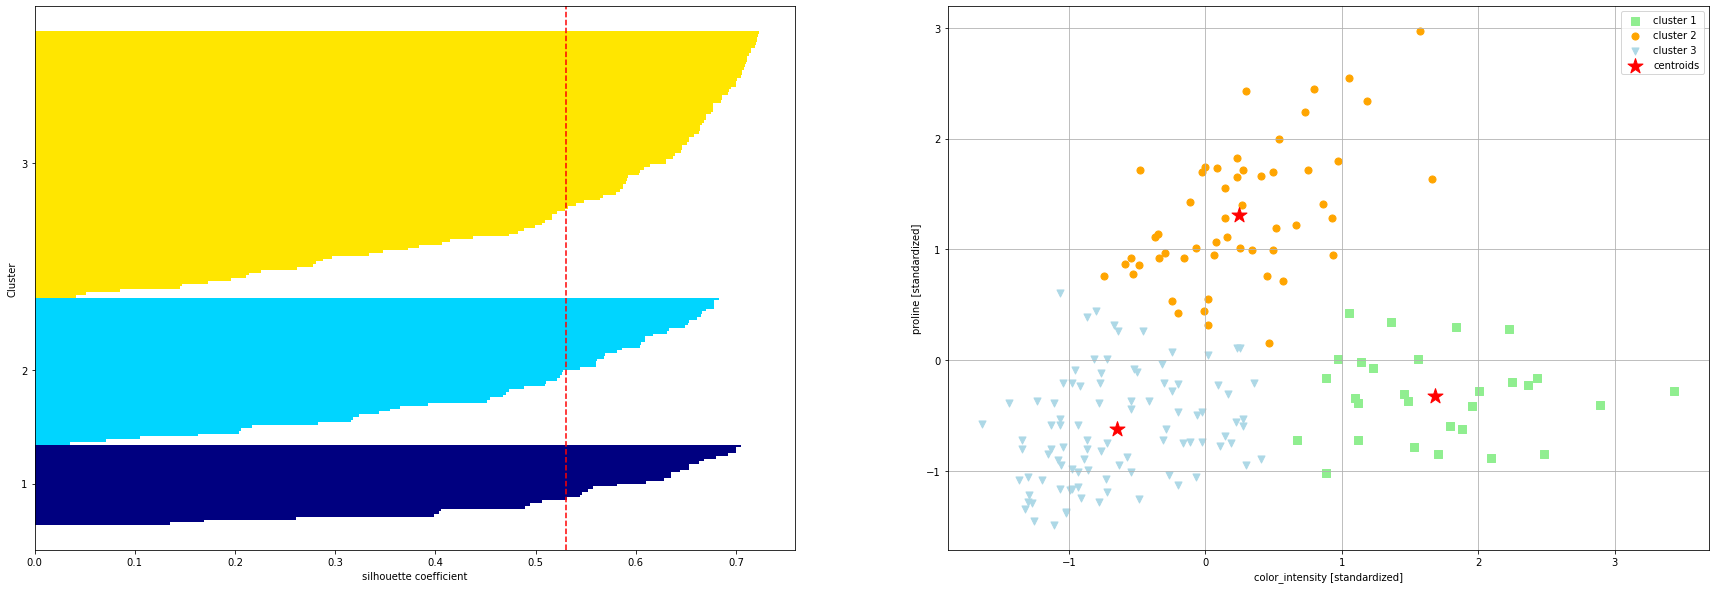

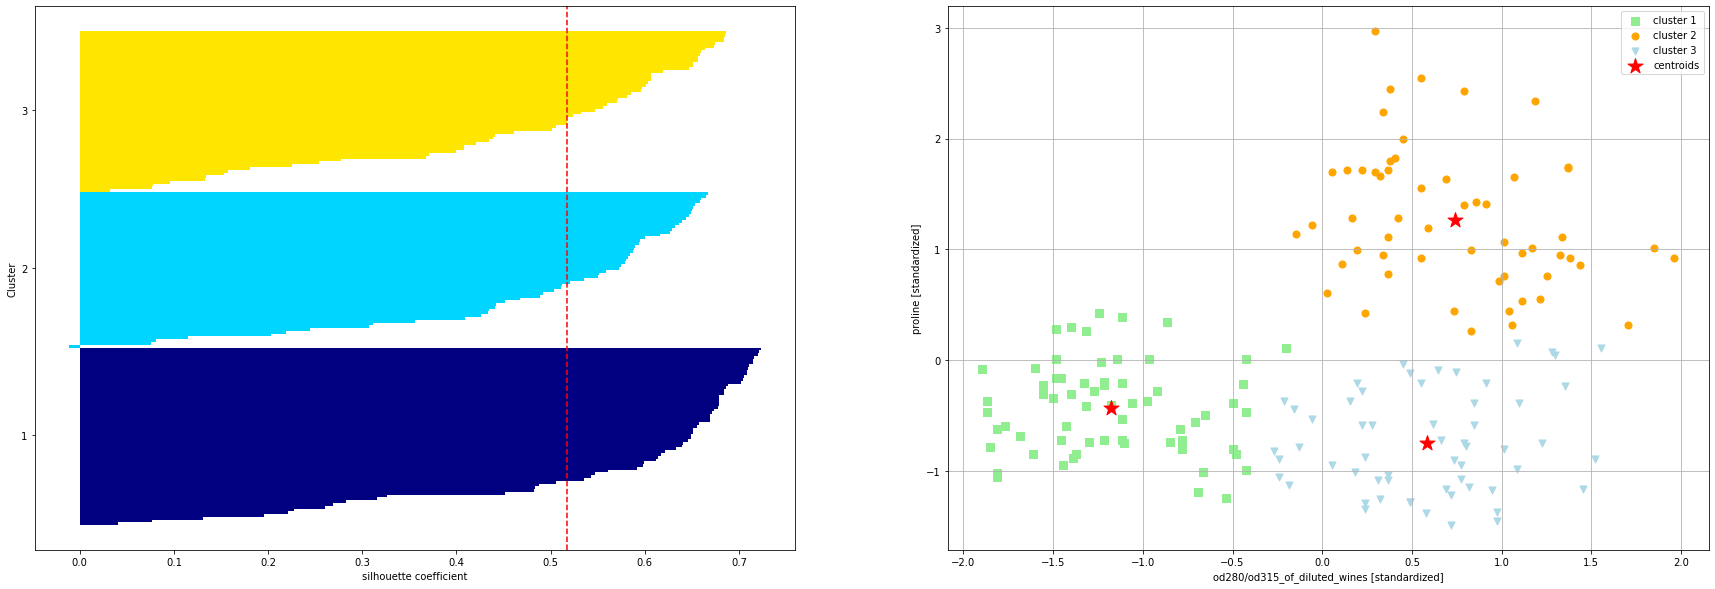

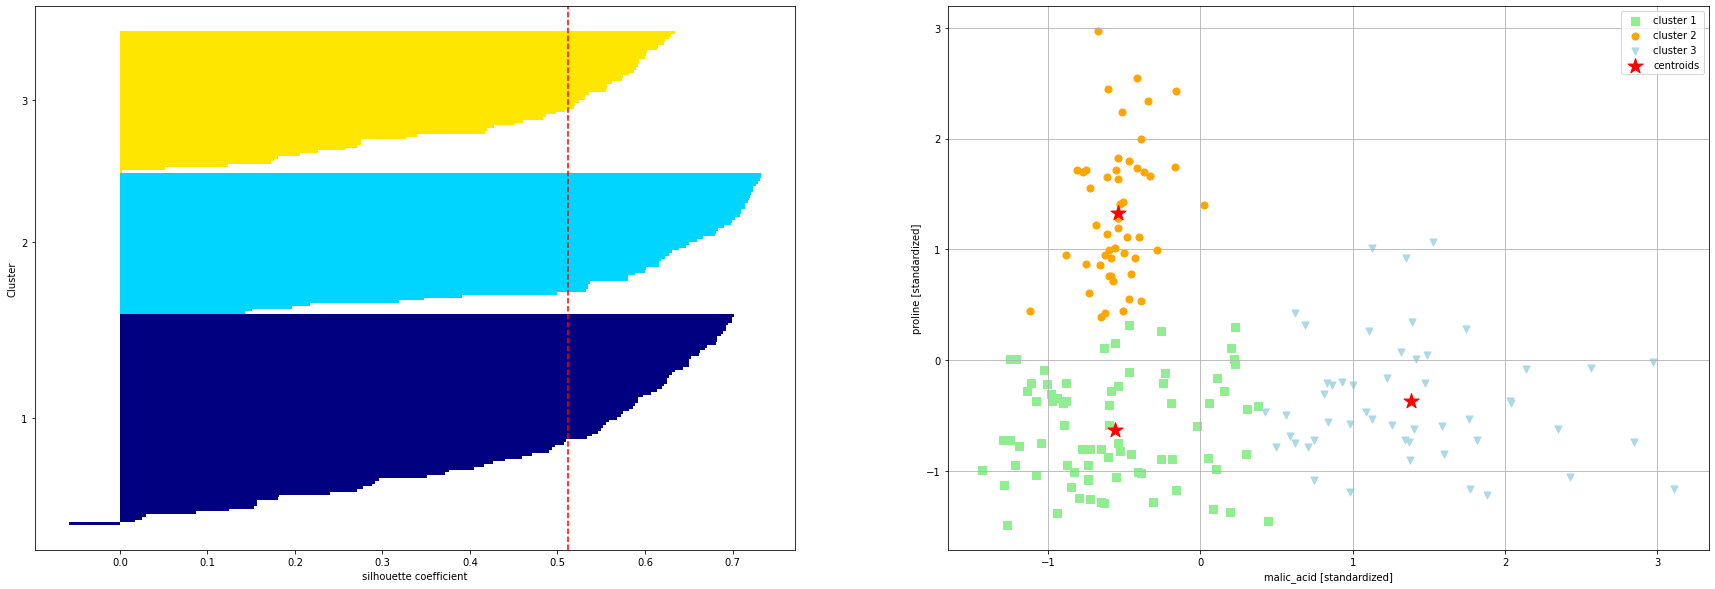

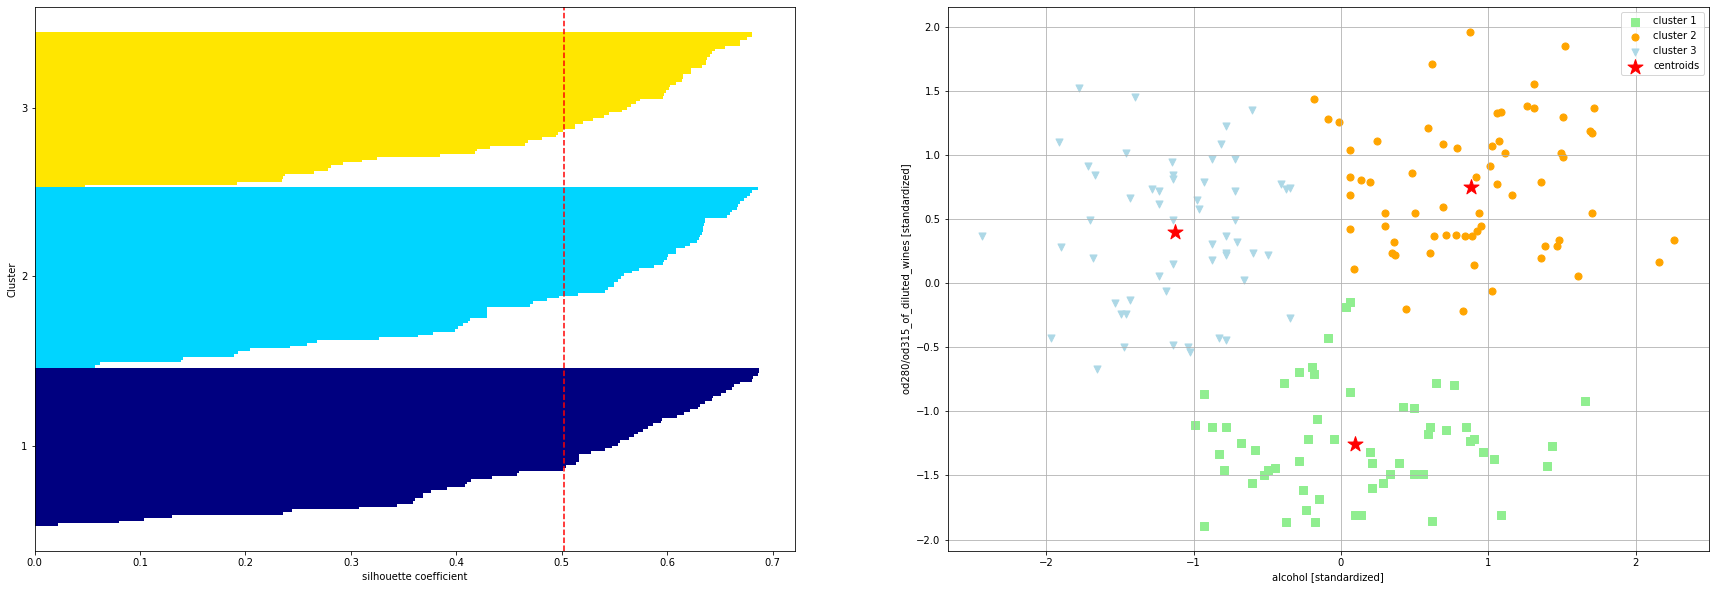

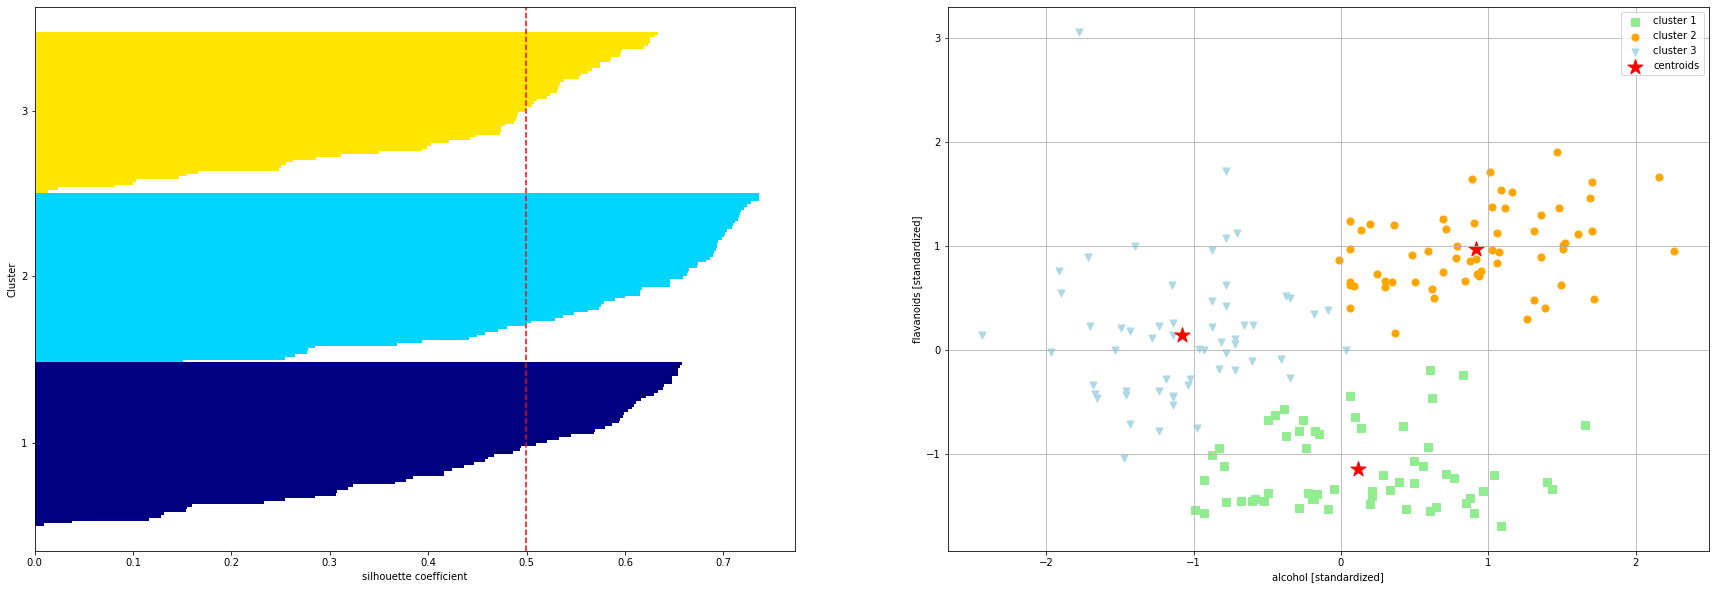

In [17]:
for f, _ in top_feature:
    plot_kmeans_shilhouette(*f)

In [18]:
for f, val in top_feature:
    print('=================')
    print("selected feature name \n", "①",wine.feature_names[f[0]], "②",wine.feature_names[f[1]], "シルエット係数 : ", val)

selected feature name 
 ① color_intensity ② proline シルエット係数 :  0.5304507181170267
selected feature name 
 ① od280/od315_of_diluted_wines ② proline シルエット係数 :  0.5173753327022985
selected feature name 
 ① malic_acid ② proline シルエット係数 :  0.5120506498511567
selected feature name 
 ① alcohol ② od280/od315_of_diluted_wines シルエット係数 :  0.5023060977226765
selected feature name 
 ① alcohol ② flavanoids シルエット係数 :  0.49931048518876886


上の結果より目視で確認する範囲では綺麗にクラスタリングできるような射影方向(特徴量ベクトル)が選ばれていることが確認できる．  
シルエット係数を見ても負の値をとるデータは極めて少なく，うまくクラスタリングできていることが確認できる．  
また前回行った，randomforestを用いてPFIの値を計算したものが以下となる．  

In [19]:
len(wine.feature_names)

13

In [20]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(wine.data, y)
pfi = permutation_importance(estimator = clf, X=wine.data, y=y,random_state = 42, n_repeats=10)
df_pfi = pd.DataFrame(
    data = {"feature name" : wine.feature_names, "importance" : pfi["importances_mean"]}
).sort_values("importance",ascending=False)
df_pfi

,feature name,importance
12,proline,0.050562
9,color_intensity,0.037079
6,flavanoids,0.029213
0,alcohol,0.006742
1,malic_acid,0.000000
2,ash,0.000000
3,alcalinity_of_ash,0.000000
4,magnesium,0.000000
5,total_phenols,0.000000
7,nonflavanoid_phenols,0.000000


ここで重要な特徴量はprolineやcolor_intensity,flavanoidsという結果が得られている．  
また今回のkmeansでシルエット係数が大きかった射影軸はにもこの３つの特徴量が含まれており，これらの結果は整合していることが見て取れる．  

最後にpcaを行ったのちkmeansを行うことで，特徴量を二つ選んで射影を行う際よりもkmeansにおける指標がより向上するのかについて考察を行う．  

まず初めにpcaによって次元圧縮を行う

In [21]:
pca = PCA(n_components=2)
X = pca.fit_transform(wine.data)

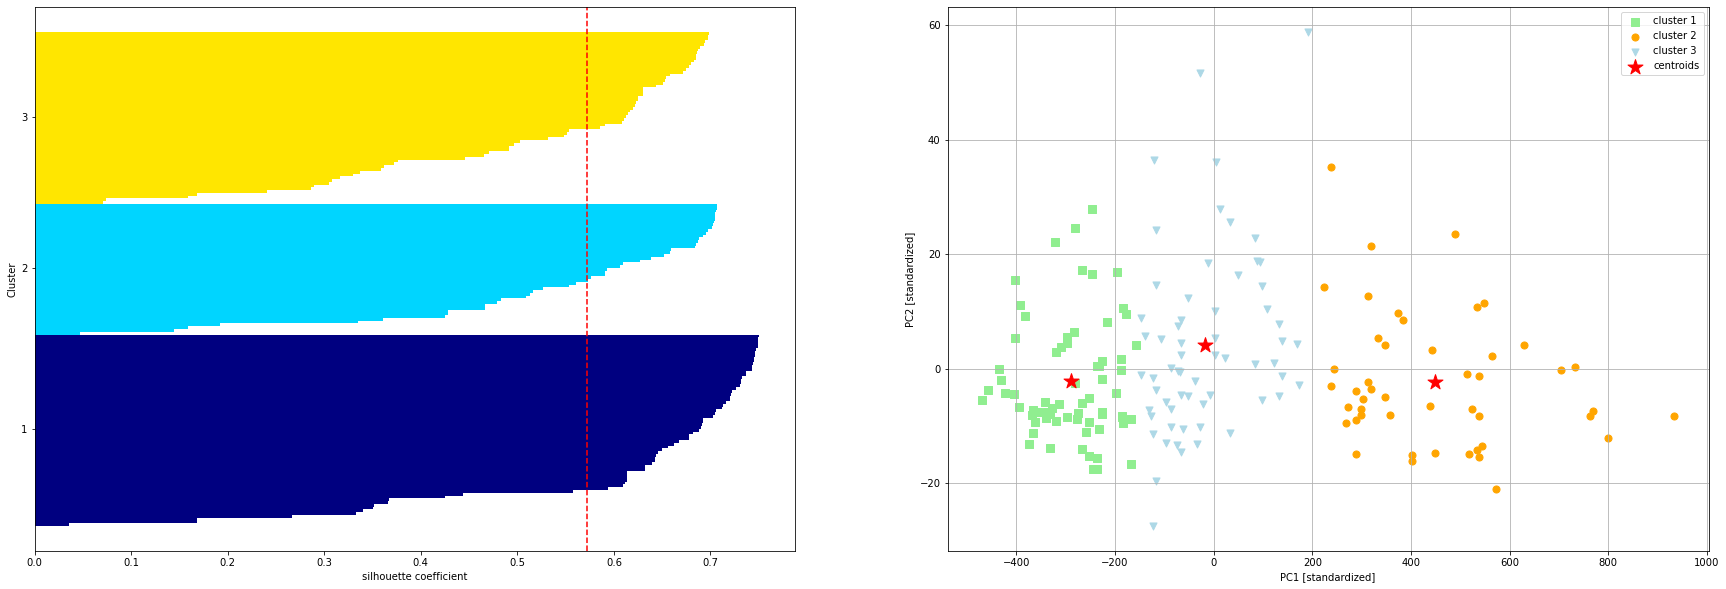

In [22]:
km = KMeans(n_clusters=3,
        init='k-means++',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=1)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)       # y_kmの要素の中で重複を無くす
n_clusters=cluster_labels.shape[0]     # 配列の長さを返す。つまりここでは n_clustersで指定した3となる

# シルエット係数を計算
silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')  # サンプルデータ, クラスター番号、ユークリッド距離でシルエット係数計算
y_ax_lower, y_ax_upper= 0,0
yticks = []
fig = plt.figure(figsize = (30,10))
ax1 = fig.add_subplot(1,2,1)

for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]      # cluster_labelsには 0,1,2が入っている（enumerateなのでiにも0,1,2が入ってる（たまたま））
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)              # サンプルの個数をクラスターごとに足し上げてy軸の最大値を決定
        color = cm.jet(float(i)/n_clusters)               # 色の値を作る
        ax1.barh(range(y_ax_lower,y_ax_upper),            # 水平の棒グラフのを描画（底辺の範囲を指定）
                         c_silhouette_vals,               # 棒の幅（1サンプルを表す）
                         height=1.0,                      # 棒の高さ
                         edgecolor='none',                # 棒の端の色
                         color=color)                     # 棒の色
        yticks.append((y_ax_lower+y_ax_upper)/2)          # クラスタラベルの表示位置を追加
        y_ax_lower += len(c_silhouette_vals)              # 底辺の値に棒の幅を追加

silhouette_avg = np.mean(silhouette_vals)                 # シルエット係数の平均値
ax1.axvline(silhouette_avg,color="red",linestyle="--")    # 係数の平均値に破線を引く 
plt.yticks(yticks,cluster_labels + 1)                     # クラスタレベルを表示
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')

ax2 = fig.add_subplot(1,2,2)
for idx in range(0, km.cluster_centers_.shape[0]):
    plt.scatter(X[y_km == idx, 0],
                X[y_km == idx, 1],
                s=50,
                c=colors[idx],
                marker=markers[idx],
                label="cluster " + str(idx+1))

plt.scatter(km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    s=250,
    marker='*',
    c='red',
    label='centroids')
plt.xlabel("PC1"+' [standardized]')
plt.ylabel("PC2"+' [standardized]')
plt.legend()
plt.grid()
plt.show()

In [23]:
print("シルエット係数",silhouette_avg)

シルエット係数 0.5722554756855064


In [24]:
print('主成分ベクトル')
pca.components_

主成分ベクトル


array([[ 1.65926472e-03, -6.81015556e-04,  1.94905742e-04,
        -4.67130058e-03,  1.78680075e-02,  9.89829680e-04,
         1.56728830e-03, -1.23086662e-04,  6.00607792e-04,
         2.32714319e-03,  1.71380037e-04,  7.04931645e-04,
         9.99822937e-01],
       [ 1.20340617e-03,  2.15498184e-03,  4.59369254e-03,
         2.64503930e-02,  9.99344186e-01,  8.77962152e-04,
        -5.18507284e-05, -1.35447892e-03,  5.00440040e-03,
         1.51003530e-02, -7.62673115e-04, -3.49536431e-03,
        -1.77738095e-02]])

PCAの結果よりkmeans後のクラスタリングの図を見ると，目視では綺麗にクラスタリングできている様子が観察できる．  
またシルエット係数を見ると，上で行った二つの特徴量ベクトルへの射影で得られたどのシルエット係数よりも高い値を得ることができている．  
一方で主成分ベクトルを見て三つのクラスターがどのような特徴を持っているかを解釈するのは容易ではないことが推察できる． 